<a href="https://maestriasydiplomados.tec.mx/posgrados/maestria-en-inteligencia-artificial-aplicada"><img src="logo_MR4010.png"></a>
<h1> <div align="center"> Dr. David Antonio-Torres</div> </h1>

# Demostración del uso de Scikit Learn con datos ficticios

# Se crea una relación ficticia entre la velocidad de los autos y la presencia de baches en las calles

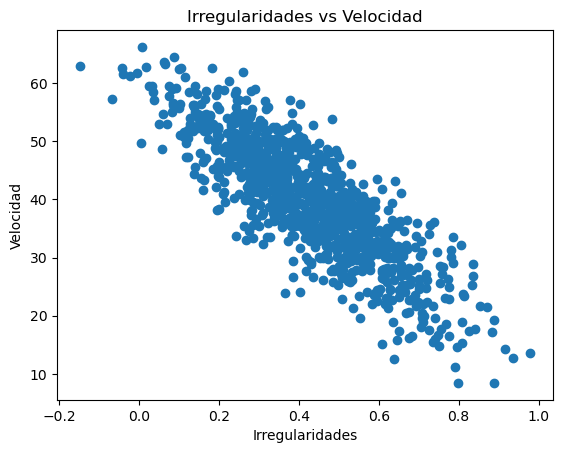

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

#distribución normal de 1000 muestras con media de 40 y desviación estándar de 10
velocidad = np.random.normal(40.0, 10.0, 1000)
# a la relación lineal se le agrega ruido gaussiano
irregularidad = (1.0 -(velocidad / 70.0)) + np.random.normal(0, 0.1, 1000)
#se prepara la gráfica
plt.title("Irregularidades vs Velocidad")
plt.xlabel("Irregularidades")
plt.ylabel("Velocidad")
plt.scatter(irregularidad, velocidad)

In [2]:
print(type(velocidad))

<class 'numpy.ndarray'>


# Se genera un modelo de Regresión Lineal

In [3]:
from sklearn.linear_model import LinearRegression

# se crea el modelo
model = LinearRegression()
model.fit(X=irregularidad.reshape(1000,1), y=velocidad.reshape(1000,1))

LinearRegression()

# Se verifica el modelo con un valor dado de irregularidad

In [4]:
#0.5 de irregularidad
vel1 = model.predict([[0.5]])
print(vel1)

[[36.22640865]]


# Se muestran los datos junto con la línea estimada por el modelo

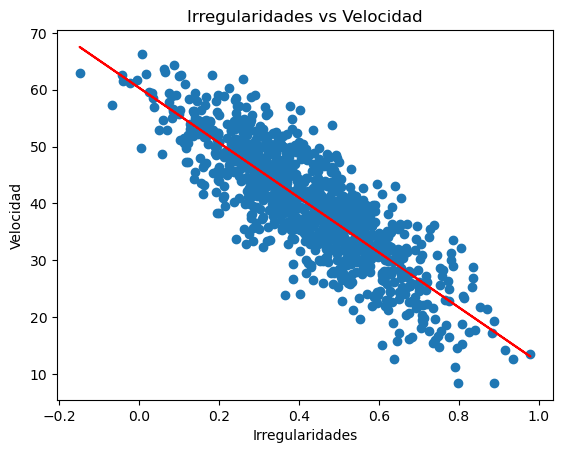

In [5]:
#gráfica de datos
plt.title("Irregularidades vs Velocidad")
plt.xlabel("Irregularidades")
plt.ylabel("Velocidad")
plt.scatter(irregularidad, velocidad)
#línea del modelo
plt.plot(irregularidad.reshape(1000,1), model.predict(irregularidad.reshape(1000,1)), color='r')

# Se pueden obtener la pendiente (*Slope*) y la intercepción (*Intercept*) de la línea recta
### https://www.geeksforgeeks.org/solving-linear-regression-in-python/

In [6]:
print('Pendiente:' ,model.coef_)
print('Intercepción:', model.intercept_)

Pendiente: [[-48.27940368]]
Intercepción: [60.36611049]


# Medición del error en el modelo

In [7]:
from sklearn.metrics import mean_squared_error, r2_score

# se calcula la predicción con los datos de X
velocidad_pred = model.predict(irregularidad.reshape(1000,1))
  
# Se calcula el error medio cuadrático con Scikit Learn
mse=mean_squared_error(velocidad,velocidad_pred)
print(mse)

# Se calcula la raíz cuadrada del error medio cuadrático  
rmse = np.sqrt(mean_squared_error(velocidad,velocidad_pred))
print(rmse)

# el mejor score es 1.0
r2 = r2_score(velocidad,velocidad_pred)
print(r2)

31.51073882614614
5.613442689308063
0.696672251606674


# Persistencia del modelo
### Una vez entrenado, el modelo se puede guardar para futuras predicciones
### https://scikit-learn.org/stable/model_persistence.html

In [8]:
import pickle

# se guarda el modelo en archivo binario
filename = "Modelo_Irreg_vs_Vel.sav"
pickle.dump(model, open(filename, 'wb'))

In [9]:
# el modelo se puede leer de archivo y usar
mi_modelo = pickle.load(open(filename, 'rb'))
vel_test = mi_modelo.predict([[0.45]])
print(vel_test)

[[38.64037883]]


In [10]:
# proceso similar con joblib
from joblib import dump, load

# el modelo se guarda en archivo
filename2 = "Modelo_Irreg_vs_Vel2.joblib"
dump(model, filename2)

# se carga el modelo
mi_modelo2 = load(filename2)
vel_test2 = mi_modelo2.predict([[0.6]])
print(vel_test2)

[[31.39846828]]


# Gracias por la atención